In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\pickle\dtm.pkl")
data = data.transpose()
data.head()

,Vir,ali,anthony,bill,bo,dave,hasan,jim,joe,john,mike,ricky
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict['bill']

[('like', 200),
 ('just', 149),
 ('right', 131),
 ('im', 107),
 ('know', 99),
 ('dont', 95),
 ('gonna', 77),
 ('got', 72),
 ('fucking', 70),
 ('yeah', 67),
 ('shit', 63),
 ('youre', 59),
 ('thats', 56),
 ('dude', 40),
 ('want', 36),
 ('think', 36),
 ('fuck', 36),
 ('people', 32),
 ('did', 31),
 ('hes', 31),
 ('guy', 30),
 ('didnt', 29),
 ('make', 28),
 ('come', 27),
 ('thing', 26),
 ('going', 26),
 ('theyre', 25),
 ('let', 24),
 ('theres', 24),
 ('doing', 23)]

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Vir
like, just, know, shit, im, dont, thats, think, right, guys, youre, did, indian, yeah
---
ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, wanna, oh
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, time, hey, got
---
mike
like, im, know, said, just, dont, thats, think, s

NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'know',
 'shit',
 'im',
 'dont',
 'thats',
 'think',
 'right',
 'guys',
 'youre',
 'did',
 'indian',
 'yeah',
 'years',
 'world',
 'got',
 'beautiful',
 'people',
 'beef',
 'day',
 'india',
 'time',
 'man',
 'believe',
 'fuck',
 'god',
 'good',
 'big',
 'thing',
 'like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'work',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'time',
 'think',
 'thing',
 'good',
 'school',
 'yeah',
 'jokes',
 'did',
 'okay',
 'ive',
 'baby',
 'gonna',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'pe

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 11),
 ('think', 8),
 ('yeah', 8),
 ('time', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('fuck', 6),
 ('oh', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('did', 5),
 ('good', 5),
 ('thing', 5),
 ('cause', 5),
 ('hes', 5),
 ('want', 5),
 ('going', 5),
 ('guys', 4),
 ('man', 4),
 ('didnt', 4),
 ('theyre', 4),
 ('theres', 4),
 ('really', 4),
 ('dude', 3),
 ('ive', 3),
 ('little', 3),
 ('went', 3),
 ('years', 2),
 ('god', 2),
 ('big', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('life', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('real', 2),
 ('id', 2),
 ('indian', 1),
 ('world', 1),
 ('beautiful', 1),
 ('beef', 1),
 ('india', 1),
 ('believe', 1),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'know',
 'im',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'think',
 'yeah',
 'time',
 'gonna',
 'said']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\pickle\clean.pkl")

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open(r"C:\Users\PIYUSH\Desktop\pickle\cv_stop.pkl", "wb"))
data_stop.to_pickle(r"C:\Users\PIYUSH\Desktop\pickle\dtm_stop.pkl")

In [8]:
data_stop

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,abc,abcs,abducted,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
data_clean

,transcript
Vir,i lost of my mind its very freeing you should...
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...


In [10]:
from wordcloud import WordCloud

In [16]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [17]:
data.head()

,Vir,ali,anthony,bill,bo,dave,hasan,jim,joe,john,mike,ricky
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

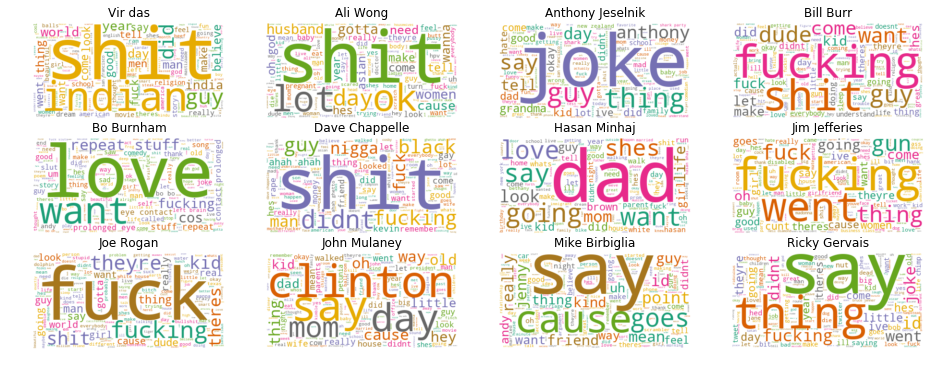

In [33]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Vir das','Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [34]:
data.head()

,Vir,ali,anthony,bill,bo,dave,hasan,jim,joe,john,mike,ricky
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame({'comedian':full_names,'unique_words':unique_list})
data_unique_sort = data_words.sort_values(by='unique_words')
data_words

,comedian,unique_words
0,Vir das,1390
1,Ali Wong,1341
2,Anthony Jeselnik,983
3,Bill Burr,1633
4,Bo Burnham,1272
5,Dave Chappelle,1404
6,Hasan Minhaj,1559
7,Jim Jefferies,1313
8,Joe Rogan,1435
9,John Mulaney,1399


In [47]:
data['bill'].to_numpy().nonzero()[0].size

1633

In [49]:
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
total_list

[3639, 3283, 2905, 5535, 3165, 4094, 4777, 4764, 4579, 4019, 4741, 4972]

In [51]:
data_words['totla_words']=total_list
data_words

,comedian,unique_words,totla_words
0,Vir das,1390,3639
1,Ali Wong,1341,3283
2,Anthony Jeselnik,983,2905
3,Bill Burr,1633,5535
4,Bo Burnham,1272,3165
5,Dave Chappelle,1404,4094
6,Hasan Minhaj,1559,4777
7,Jim Jefferies,1313,4764
8,Joe Rogan,1435,4579
9,John Mulaney,1399,4019


Text(0.5, 1.0, 'Number of Unique Words')

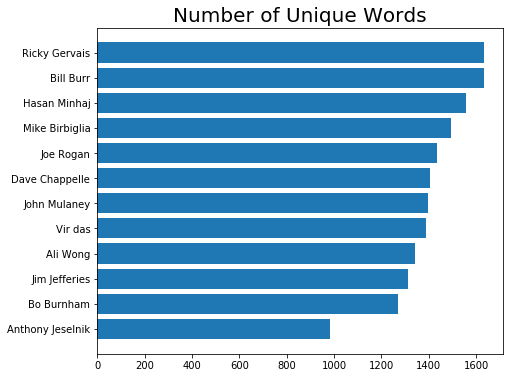

In [54]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

In [58]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 11),
 ('think', 8),
 ('yeah', 8),
 ('time', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('fuck', 6),
 ('oh', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('did', 5),
 ('good', 5),
 ('thing', 5),
 ('cause', 5),
 ('hes', 5),
 ('want', 5),
 ('going', 5),
 ('guys', 4),
 ('man', 4),
 ('didnt', 4),
 ('theyre', 4),
 ('theres', 4),
 ('really', 4),
 ('dude', 3),
 ('ive', 3),
 ('little', 3),
 ('went', 3),
 ('years', 2),
 ('god', 2),
 ('big', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('life', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('real', 2),
 ('id', 2),
 ('indian', 1),
 ('world', 1),
 ('beautiful', 1),
 ('beef', 1),
 ('india', 1),
 ('believe', 1),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1

In [71]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words['f_word']=data_bad_words['fucking']+data_bad_words['fuck']
data_bad_words['s_word']=data_bad_words['shit']
data_bad_words.drop(['fucking','fuck','shit'],axis=1,inplace=True)
data_bad_words

,f_word,s_word
Vir,24,44
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6


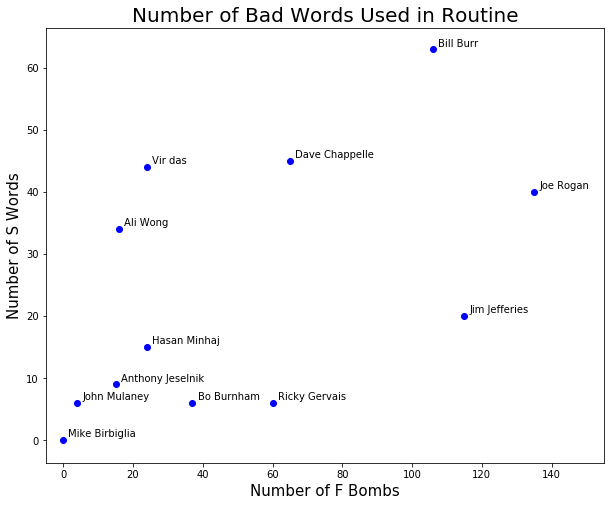

In [77]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_bad_words.index):
    x = data_bad_words.f_word.loc[comedian]
    y = data_bad_words.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()